In [140]:
import soundata

In [141]:
dataset = soundata.initialize('urbansound8k')
# dataset.download(force_overwrite=True)  # download the dataset
# dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data

Clip(
  audio_path="/tmp\sound_datasets\urbansound8k\audio/fold10/197554-2-0-23.wav",
  clip_id="197554-2-0-23",
  audio: The clip's audio
            * np.ndarray - audio signal
            * float - sample rate,
  class_id: The clip's class id.
            * int - integer representation of the class label (0-9). See Dataset Info in the documentation for mapping,
  class_label: The clip's class label.
            * str - string class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, street_music,
  fold: The clip's fold.
            * int - fold number (1-10) to which this clip is allocated. Use these folds for cross validation,
  freesound_end_time: The clip's end time in Freesound.
            * float - end time in seconds of the clip in the original freesound recording,
  freesound_id: The clip's Freesound ID.
            * str - ID of the freesound.org recording from which this clip was taken,
  freesound_start_time:

In [142]:
import pandas as pd
import seaborn as sns
import numpy as np

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Sample Rate: 44100 Hz
Duration: 4.0 seconds


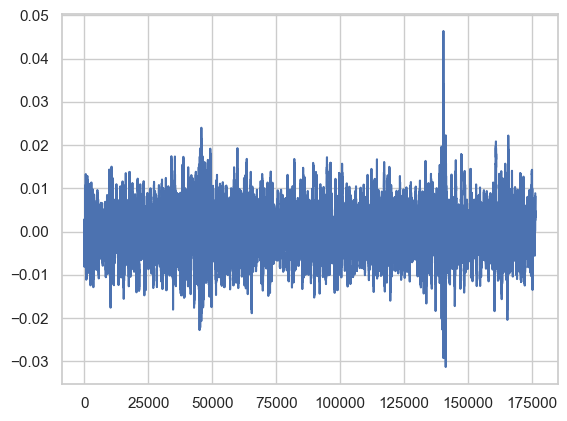

In [143]:
sns.set(style="whitegrid")
sns.lineplot(x=np.arange(len(example_clip.audio[0])), y = example_clip.audio[0])

print("Sample Rate: " + str(example_clip.audio[1]) + " Hz")

print("Duration: " + str(example_clip.audio[0].shape[0] / example_clip.audio[1]) + " seconds")

In [144]:
import librosa as lr

In [145]:
example_clip_librosa_loaded = lr.load(example_clip.audio_path, sr = example_clip.audio[1], duration=4.0)

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<AxesSubplot:>

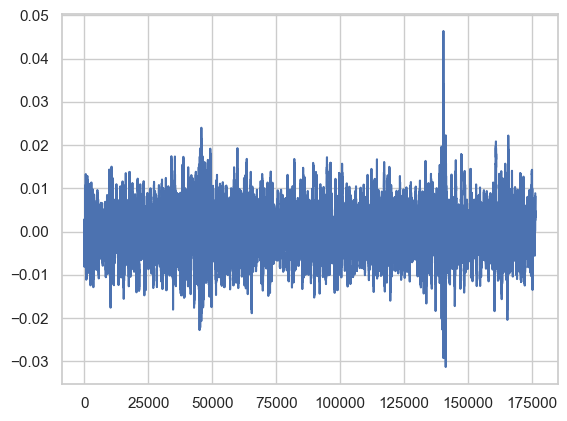

In [146]:
sns.lineplot(x=np.arange(len(example_clip_librosa_loaded[0])), y = example_clip_librosa_loaded[0])

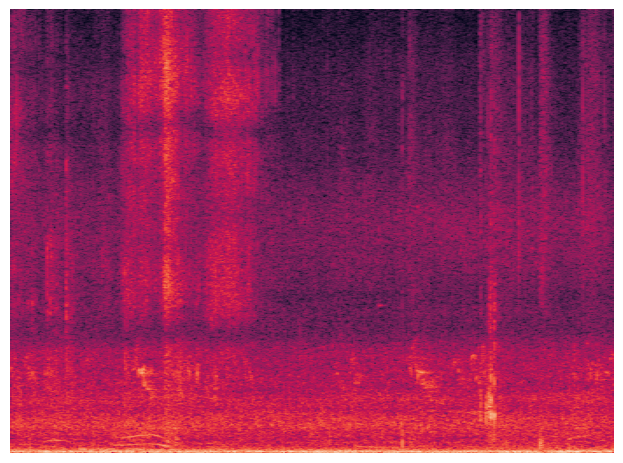

In [147]:

spectrogram = lr.stft(example_clip_librosa_loaded[0])
spectrogram = lr.amplitude_to_db(np.abs(spectrogram), ref=np.max)

import matplotlib.pyplot as plt
plt.figure(frameon=False)
plt.imshow(spectrogram, aspect='auto', origin='lower')
plt.axis('off')
plt.tight_layout()
plt.savefig('spectrogram.png', bbox_inches='tight', pad_inches=0)

In [148]:
example_clip.class_label

'children_playing'